<a href="https://colab.research.google.com/github/CristianoCoelhoSilva/Python/blob/master/PNAD_COVID_ARVORE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pesquisa Nacional por Amostra de Domicílios - PNAD COVID19

Objetiva estimar o número de pessoas com sintomas referidos associados à síndrome gripal e monitorar os impactos da pandemia da COVID-19 no mercado de trabalho brasileiro.

A coleta da Pesquisa Nacional por Amostra de Domicílios - PNAD COVID19 teve início em 4 de maio de 2020, com entrevistas realizadas por telefone em, aproximadamente, 48 mil domicílios por semana, totalizando cerca de 193 mil domicílios por mês, em todo o Território Nacional. A amostra é fixa, ou seja, os domicílios entrevistados no primeiro mês de coleta de dados permanecerão na amostra nos meses subsequentes, até o fim da pesquisa.

O questionário se divide em duas partes, sendo uma direcionada a questões de saúde, especificamente sobre sintomas associados à síndrome gripal e outra, a questões de trabalho. Nas questões de saúde, investiga-se a ocorrência de alguns dos principais sintomas da COVID19 no período de referência da pesquisa, considerando-se todos os moradores do domicílio. Para aqueles que apresentaram algum sintoma, perguntam-se quais as providências tomadas para alivio dos sintomas; se buscaram por atendimento médico devido a esses sintomas; e o tipo de estabelecimento de saúde procurado. Nas questões de trabalho, busca-se classificar a população em idade de trabalhar nas seguintes categorias: ocupados, desocupados e pessoas fora da força de trabalho. Investiga-se, ainda, os seguintes aspectos: ocupação e atividade; afastamento do trabalho e o motivo do afastamento; exercício de trabalho remoto; busca por trabalho; motivo por não ter procurado trabalho; horas semanais efetivamente e habitualmente trabalhadas; assim como o rendimento efetivo e habitual do trabalho. Por fim, visando compor o rendimento domiciliar, pergunta-se se algum morador recebeu outros rendimentos não oriundos do trabalho, tais como: aposentadoria, BPC-LOAS, Bolsa Família, algum auxílio emergencial relacionado à COVID, seguro desemprego, aluguel e outros. Cabe ressaltar que a PNAD COVID19 é uma pesquisa com instrumento dinâmico de coleta das informações; portanto, o questionário está sujeito a alterações ao longo do período de sua aplicação.

A pesquisa prevê divulgações semanais para alguns indicadores, em nível Brasil, e divulgações mensais para um conjunto mais amplo de indicadores, por Unidades da Federação.

Os resultados da PNAD COVID19 são pioneiros no sentido de constituírem a primeira divulgação de Estatísticas Experimentais elaboradas pelo IBGE, as quais estão alinhadas com a estratégia de modernização do Instituto e permitem a ampliação das ofertas de informação para atender às necessidades de seus usuários.

https://www.ibge.gov.br/estatisticas/downloads-estatisticas.html?caminho=Trabalho_e_Rendimento/Pesquisa_Nacional_por_Amostra_de_Domicilios_PNAD_COVID19/Microdados/Dados

# Características dos dados

Parte 1 - Identificação e Controle
Parte A - Características gerais dos moradores
Parte B - COVID19 - Todos os moradores
Parte C - Características de trabalho das pessoas de 14 anos ou mais de idade
Parte D - Rendimento de outras fontes dos moradores de 14 anos ou mais de idade
Parte E - Empréstimos
Parte Suplementar 01 - Características da habitação


# Prospecção de Internação e sedação, entubação ou colocado em respiração artificial com ventilador de COVID-19 em relação aos sintomas sentidos e diagnóstico médico de alguma comorbidade


A COVID-19 afeta diferentes pessoas de diferentes maneiras. A maioria das pessoas infectadas apresentará sintomas leves a moderados da doença e não precisarão ser hospitalizadas. De acordo com a base de dados coletada e tratada, a nossa intenção é predizer qual é a chance de uma pessoa que sentiu algum dos sintomas (febre, tosse, dor de garganta, difilcudade de respirar dor de cabeça, dor no peito, nausea, nariz entupido ou escorrendo, fadiga, dor nos olhos, perdade de paladar ou olfato, dor muscular ou diarreia) e que tem ou não algum diagnostico de algum comorbidade como diabetes, obesidade, hipertensão, tuberculose, entre outros, aumentam a possíbilidade de internação ou entubação.

In [68]:
import csv
import matplotlib as mpl
import pandas as pd
import mpl_toolkits.mplot3d
from scipy.interpolate import *
import matplotlib.pyplot as plt
from sklearn import linear_model
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import seaborn
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [69]:
#Arquivo completo
#df = pd.read_csv(r"https://raw.githubusercontent.com/CristianoCoelhoSilva/Python/master/Python/covid.csv")
#Arquivo com apenas 2 mil Observações
df = pd.read_csv(r"https://raw.githubusercontent.com/CristianoCoelhoSilva/Python/master/Python/covid_limit.csv")

In [70]:
df.describe()

,NUMERO,SEMANA,NUMERO_ENTREVISTA,NUMERO_ORDEM,MES,IDADE,FEBRE,TOSSE,GARGANTA,RESPIRAR,CABECA,PEITO,NAUSEA,NARIZ,FADIGA,OLHOS,OLFATO,MUSCULAR,DIARREIA,DIABETES,HIPERTENSAO,RESPIRATORIO,CORACAO,DEPRESSAO,CANCER,ESTABELECIMENTO,B005,B006
count,1945.000000,1945.000000,1945.0,1945.000000,1945.0,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.00000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000
mean,7.392802,2.421594,3.0,2.084319,7.0,38.480206,1.599486,1.596401,1.617995,1.826221,1.442674,1.824679,1.840617,1.71054,1.722879,2.069923,1.944473,1.844730,2.047301,1.931105,1.825193,1.904370,1.969666,1.952699,1.995887,1.724936,3.746530,3.971208
std,4.004364,1.109326,0.0,1.410967,0.0,19.491893,0.571529,0.572058,0.542044,0.588497,0.553635,0.418954,0.438966,0.48646,0.479858,1.374086,1.245982,1.254438,1.274886,0.304939,0.480358,0.339611,0.295029,0.320468,0.248418,0.477821,0.688694,0.262925
min,1.000000,1.000000,3.0,1.000000,7.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,1.000000,3.0,1.000000,7.0,24.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.00000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,4.000000,4.000000
50%,7.000000,2.000000,3.0,2.000000,7.0,38.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,4.000000
75%,11.000000,3.000000,3.0,3.000000,7.0,52.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,4.000000
max,14.000000,4.000000,3.0,10.000000,7.0,98.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,4.000000,4.000000


In [71]:
#Removendo as colunas
df.drop(["NUMERO","SEMANA","NUMERO_ENTREVISTA","NUMERO_ORDEM","UF","SITUACAO","DOMICILIO","RESPONDEU","ESCOLARIDADE"], axis="columns", inplace=True)
df.drop(["B006"], axis="columns", inplace=True)

In [72]:
from sklearn.model_selection import train_test_split

X = df.drop(['B005'], axis = "columns")
y = df.B005

In [73]:
from sklearn.model_selection import train_test_split

# Dividir nossos dados
train, test, train_labels, test_labels = train_test_split(X,
                                                          y,
                                                          test_size=0.33,
                                                          random_state=42)

In [74]:
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [75]:
non_numeric_columns = ['GENERO', 'RACA']
df[non_numeric_columns].agg(['unique'])

,GENERO,RACA
unique,"[Homem, Mulher]","[Parda, Branca, Preta, Amarela, Indígena]"


In [77]:
# Cria nosso pipeline para pré-processamento com imputação, dummização e normalização
encoder_imputer_scaled_transformer = make_column_transformer(
    (make_pipeline(
        (KNNImputer(n_neighbors = 3)),
        (StandardScaler())
    ) , make_column_selector(dtype_include = np.number)),
    (make_pipeline(
        SimpleImputer(strategy = 'most_frequent'),
        OneHotEncoder(handle_unknown = 'ignore'),
    ), make_column_selector(dtype_exclude = np.number)),
    remainder = 'passthrough'
)

encoder_imputer_scaled_transformer.fit(train)

X_train_encoded_imputed = encoder_imputer_scaled_transformer.transform(train)
X_train_encoded_imputed

encoder_imputer_scaled_transformer.fit(test)

X_test_encoded_imputed = encoder_imputer_scaled_transformer.transform(test)
X_test_encoded_imputed

array([[ 0.        , -0.83871848,  0.81173563, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.85255227,  0.81173563, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.        ,  1.70021619,  0.81173563, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.        , -0.7371611 ,  0.81173563, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.        , -0.63560371, -1.23192819, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.        , -0.83871848,  0.81173563, ...,  0.        ,
         1.        ,  0.        ]])

In [78]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_encoded_imputed, train_labels) # o método fit "treina o modelo"

In [80]:
preds = clf.predict(X_test_encoded_imputed)
print(preds)

[4 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 1 4 4 4 4 4 4 2 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 2 4 2 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4
 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 2 4 4 4 4 4 4 2 4 4
 1 2 4 2 4 4 4 4 4 2 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 2 2 4 4 4 4 2 2 4 4
 2 4 4 4 4 4 4 2 4 2 4 4 4 4 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 2 4 4 4 2 4 4 4 4 4 4 4 2 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 4 2 4 4 4 4 4 4 4 4 2 4 4 4 2 2
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 4 4 4 2 4 4 4 2
 4 1 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 2 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4
 4 4 4 4 4 4 1 4 2 2 4 4 4 4 2 4 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4
 4 2 4 4 4 4 2 4 4 2 4 2 1 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 4 2 4 4 4 4 4
 4 4 2 4 4 4 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 4 4 4 2 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

In [81]:
from sklearn.metrics import accuracy_score

# Avaliar a precisão
print(accuracy_score(test_labels, preds))

0.8520249221183801


In [82]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, preds)

array([[  1,   3,   0,   0],
       [  2,  20,   0,  38],
       [  1,   1,   0,   4],
       [  3,  43,   0, 526]])

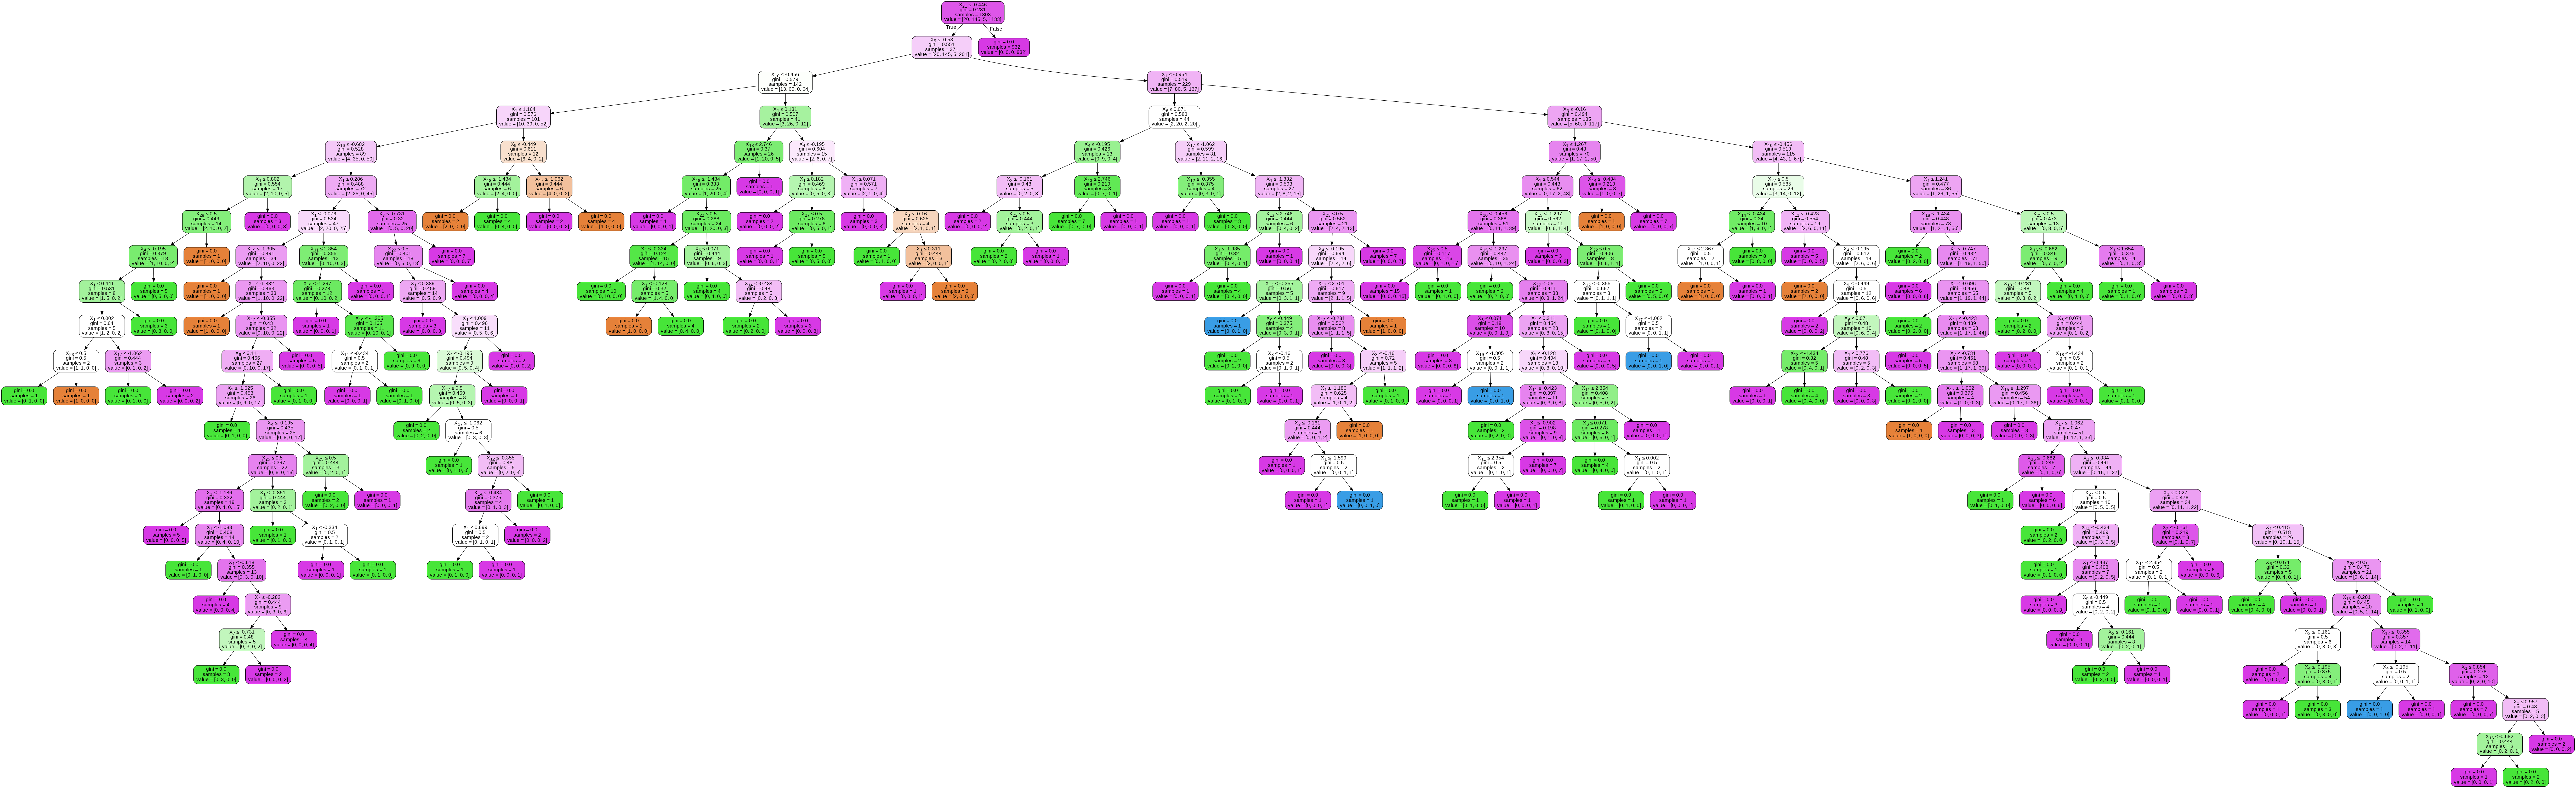

In [83]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [84]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train_encoded_imputed, train_labels)
preds = clf.predict(X_test_encoded_imputed)
print(accuracy_score(test_labels, preds))
confusion_matrix(test_labels, preds)

0.8598130841121495


array([[  0,   3,   0,   1],
       [  5,  18,   0,  37],
       [  0,   2,   0,   4],
       [  1,  37,   0, 534]])

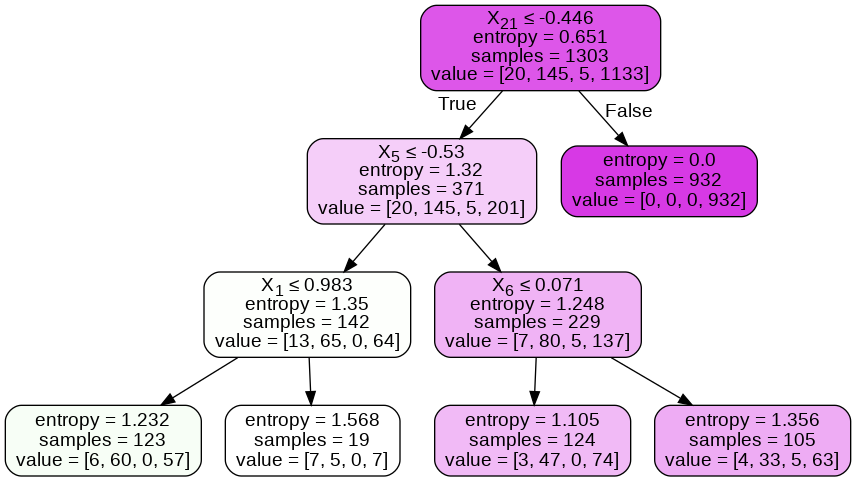

In [85]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [86]:
from sklearn.tree import export_text
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
#decision_tree = decision_tree.fit(X_train_encoded_imputed, y)
preds = clf.predict(X_test_encoded_imputed)
print(accuracy_score(test_labels, preds))
print(confusion_matrix(test_labels, preds))
#r = export_text(decision_tree, feature_names=iris['feature_names'])
#print(r)

0.8598130841121495
[[  0   3   0   1]
 [  5  18   0  37]
 [  0   2   0   4]
 [  1  37   0 534]]


# Naive Bayes

Os métodos Naive Bayes são um conjunto de algoritmos de aprendizagem supervisionada com base na aplicação do teorema de Bayes com a suposição "ingênua" de independência condicional entre cada par de recursos dado o valor da variável de classe.

O teorema de Bayes calcula a probabilidade de um evento ocorrer, com base em certas outras probabilidades que estão relacionadas ao evento em questão. É composto de um prior (as probabilidades de que temos conhecimento ou que nos são dadas) e do posterior (as probabilidades que procuramos calcular usando os priors).

A fórmula de Bayes é a seguinte:

P(A|B)=P(B|A)P(A)/P(B)

P (A) é a probabilidade anterior de A ocorrer independentemente. Em nosso exemplo, é P (D). Este valor é dado a nós como a priori.

P (B) é a probabilidade anterior de B ocorrer independentemente. 

P (A | B) é a probabilidade posterior de que A ocorra dado B. 

P (B | A) é a probabilidade de ocorrência de B, dado A. Este valor é dado a nós como a priori também.

Uma das muitas aplicações do teorema de Bayes é a inferência bayesiana, uma abordagem particular da inferência estatística. Quando aplicado, as probabilidades envolvidas no teorema de Bayes podem ter diferentes interpretações de probabilidade. Com a interpretação bayesiana de probabilidade, o teorema expressa como a probabilidade de um evento (ou o grau de crença na ocorrência de um evento) deve ser alterada após considerar evidências sobre a ocorrência deste evento. A inferência bayesiana é fundamental para a estatística bayesiana.

In [87]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_encoded_imputed, train_labels)
y_pred = gnb.predict(X_test_encoded_imputed)
confusion_matrix(test_labels, y_pred)

array([[  0,   0,   0,   4],
       [  0,   0,   0,  60],
       [  0,   0,   0,   6],
       [  0,   0,   0, 572]])

# Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_encoded_imputed, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [89]:
rfpreds = rf.predict(X_test_encoded_imputed)

In [90]:
print(accuracy_score(test_labels, rfpreds))

0.867601246105919


In [91]:
confusion_matrix(test_labels, rfpreds)

array([[  0,   4,   0,   0],
       [  1,   8,   1,  50],
       [  0,   1,   0,   5],
       [  0,  23,   0, 549]])

In [92]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_encoded_imputed, train_labels)
rfpreds = rf.predict(X_test_encoded_imputed)
print('Acurácia:',accuracy_score(test_labels, rfpreds))
confusion_matrix(test_labels, rfpreds)

Acurácia: 0.8800623052959502


array([[  0,   4,   0,   0],
       [  0,  11,   1,  48],
       [  0,   1,   0,   5],
       [  0,  18,   0, 554]])